<a href="https://colab.research.google.com/github/seonae0223/machine_learning/blob/main/03_Text_Mining_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텍스트 마이닝
- 텍스트로부터 정보를 추출해내는 기법

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/한경_MLOps/머신러닝/04. 텍스트마이닝/data/Amazon_Unlocked_Mobile.csv'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(FILE_PATH)
df.head()

Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phone, nice up grade from my pantach revu...           0.0  
2       5                                       Very pleased           0.0  
3       4  It works good but it goes slow sometimes but i...           0.0  
4       4  Great phone to replace my lost phone. The only...           0.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [5]:
df.isnull().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            70
Review Votes    12296
dtype: int64

# 시각화

In [6]:
sns.set_theme(style='whitegrid', palette='pastel' )

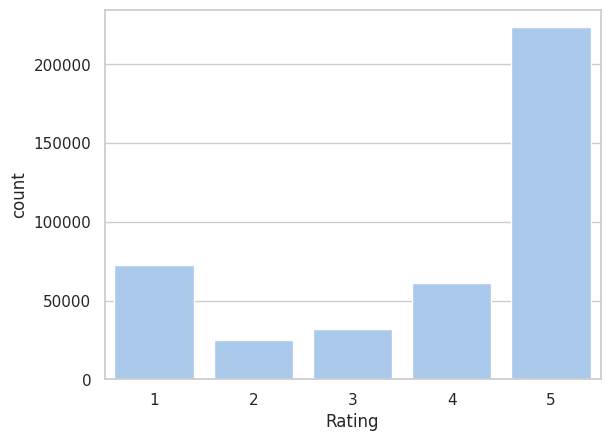

In [8]:
sns.countplot(data=df, x='Rating')
plt.show()

In [10]:
# 리뷰의 글자 수 확인
df['Reviews'].dropna().map(len)

0         374
1         214
2          12
3          76
4         223
         ... 
413835     30
413836      2
413837     43
413838     92
413839     83
Name: Reviews, Length: 413770, dtype: int64

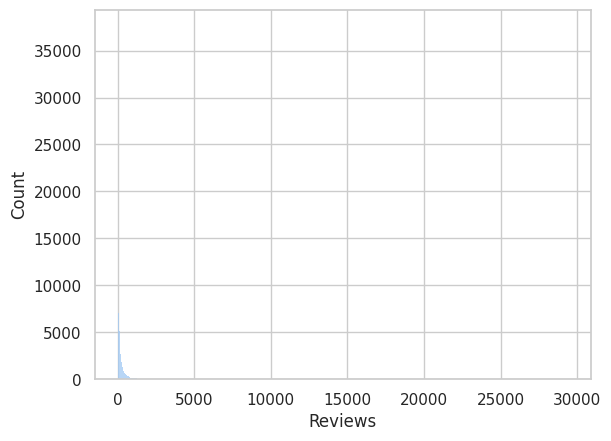

In [12]:
# 리뷰의 길이 분포 (글자 수)
sns.histplot(df['Reviews'].dropna().map(len))
plt.show()

In [13]:
# 가장 긴 리뷰의 글자 수
df['Reviews'].dropna().map(len).max()

29419

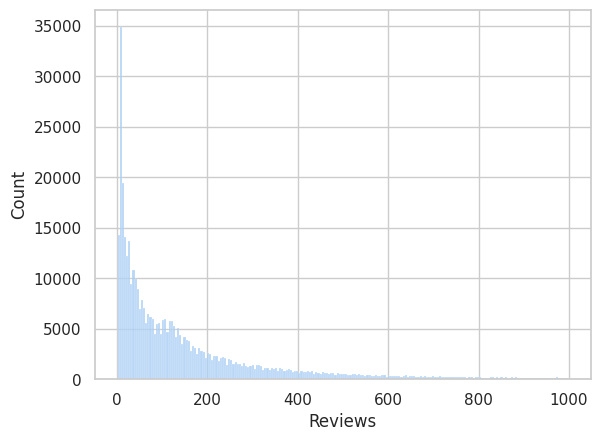

In [14]:
# 1000글자 미만의 리뷰만 시각화
reviews_chars = df['Reviews'].dropna().map(len)
reviews_chars_under_1000_mask = reviews_chars < 1000

sns.histplot(reviews_chars[reviews_chars_under_1000_mask])
plt.show()

In [15]:
# 리뷰 단어의 개수
df['Reviews'].dropna().map(lambda x : len(x.split()))

0         72
1         40
2          2
3         17
4         43
          ..
413835     5
413836     1
413837     7
413838    19
413839    13
Name: Reviews, Length: 413770, dtype: int64

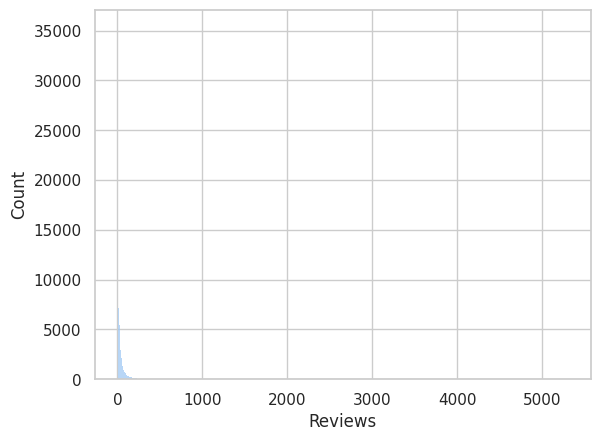

In [16]:
sns.histplot(df['Reviews'].dropna().map(lambda x : len(x.split())))
plt.show()

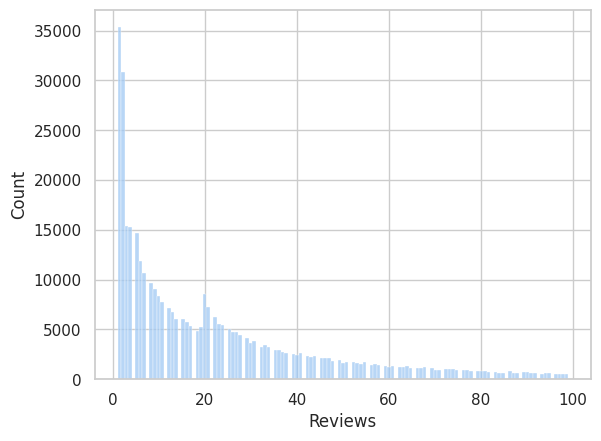

In [17]:
reviews_words = df['Reviews'].dropna().map(lambda x : len(x.split()))
reviews_words_under_100_mask = reviews_words < 100

sns.histplot(reviews_words[reviews_words_under_100_mask])
plt.show()

In [18]:
# 리뷰의 길이와 투표 수(Review Vote)의 상관 관계
df['Review Words'] = df['Reviews'].dropna().map(lambda x : len(x.split())) # 원래는 split 대신, tokenizer를 사용하는 것이 맞음.

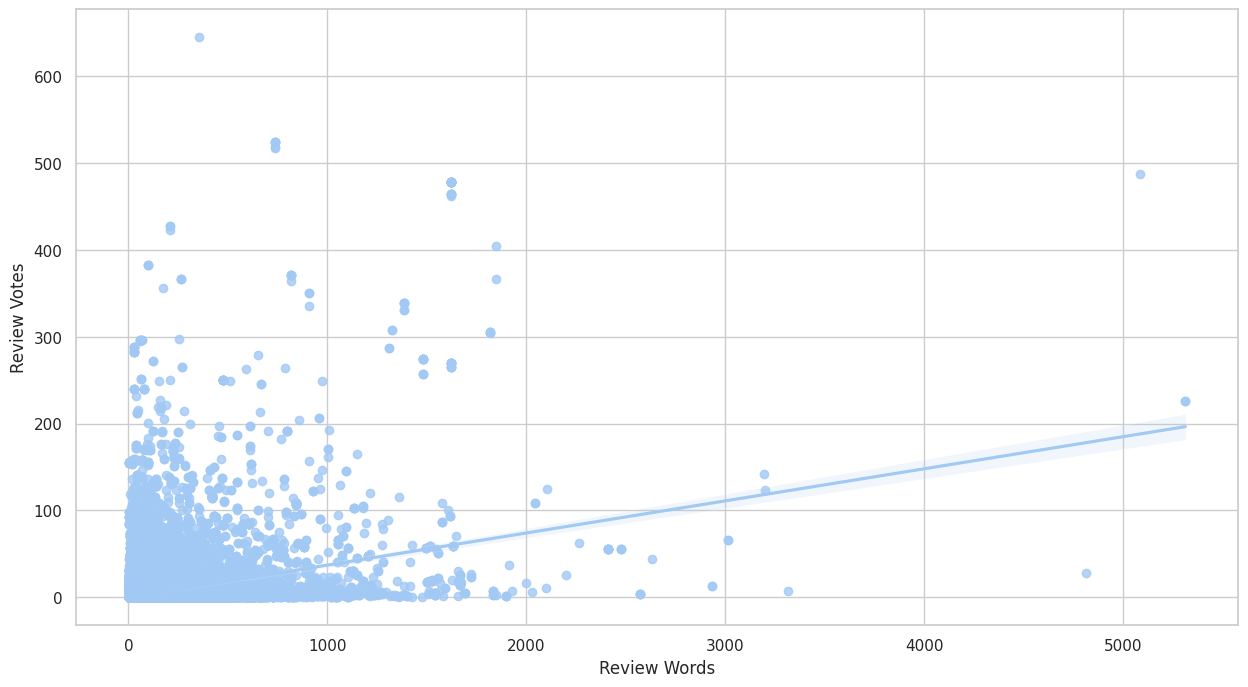

In [19]:
plt.figure(figsize=(15, 8))

sns.regplot(x = 'Review Words', y ='Review Votes', data=df) # 회귀 분석을 해주는 시각화 그래프
plt.show()

In [20]:
# 애플과 삼성의 평균 평점
df[df['Brand Name'] == "Samsung"]["Rating"].mean()

3.9623556968378786

In [21]:
df[df['Brand Name'] == "Apple"]["Rating"].mean()

3.9244148076856975

텍스트 마이닝을 통해 삼성과 애플 핸드폰의 부정/긍정적인 리뷰에 대한 단어(키워드)를 분석

In [22]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords') #불용어 사전 다운로드
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# 불용어 제거하기
- 불용어란?
   -  갖고 있는 데이터에서 유의미한 단어 토큰만을 선별하기 위해서는 큰 의미가 없는 단어 토큰을 제거하는 작업이 필요한데, 여기서 큰 의미가 없다라는 것은 자주 등장하지만 분석을 하는 것에 있어서는 큰 도움이 되지 않는 단어들을 의미한다.
   - 예를 들면, I, my, me, over, 조사, 접미사 같은 단어들은 문장에서는 자주 등장하지만 실제 의미 분석을 하는데는 거의 기여하는 바가 없는 경우가 있다.
   - 이러한 단어들을 불용어(stopword)라고 하며, NLTK에서는 위와 같은 100여개 이상의 영어 단어들을 불용어로 패키지 내에서 미리 정의하고 있다.

In [23]:
stopwords.words("english")[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [24]:
from nltk import word_tokenize

sample_review = df.loc[0, 'Reviews']
print(sample_review)

I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


In [26]:
# 영어는 일반적으로 소문자로 만들어 준 다음 전처리를 수행
sample_review_lower = sample_review.lower()
print(word_tokenize(sample_review_lower))

['i', 'feel', 'so', 'lucky', 'to', 'have', 'found', 'this', 'used', '(', 'phone', 'to', 'us', '&', 'not', 'used', 'hard', 'at', 'all', ')', ',', 'phone', 'on', 'line', 'from', 'someone', 'who', 'upgraded', 'and', 'sold', 'this', 'one', '.', 'my', 'son', 'liked', 'his', 'old', 'one', 'that', 'finally', 'fell', 'apart', 'after', '2.5+', 'years', 'and', 'did', "n't", 'want', 'an', 'upgrade', '!', '!', 'thank', 'you', 'seller', ',', 'we', 'really', 'appreciate', 'it', '&', 'your', 'honesty', 're', ':', 'said', 'used', 'phone.i', 'recommend', 'this', 'seller', 'very', 'highly', '&', 'would', 'but', 'from', 'them', 'again', '!', '!']


In [27]:
sample_review_word_tokens = word_tokenize(sample_review_lower)
sample_review_word_without_stopwords = [token for token in sample_review_word_tokens if token not in stopwords.words("english")]

sample_review_word_without_stopwords

['feel',
 'lucky',
 'found',
 'used',
 '(',
 'phone',
 'us',
 '&',
 'used',
 'hard',
 ')',
 ',',
 'phone',
 'line',
 'someone',
 'upgraded',
 'sold',
 'one',
 '.',
 'son',
 'liked',
 'old',
 'one',
 'finally',
 'fell',
 'apart',
 '2.5+',
 'years',
 "n't",
 'want',
 'upgrade',
 '!',
 '!',
 'thank',
 'seller',
 ',',
 'really',
 'appreciate',
 '&',
 'honesty',
 ':',
 'said',
 'used',
 'phone.i',
 'recommend',
 'seller',
 'highly',
 '&',
 'would',
 '!',
 '!']

# 아마존 스마트폰 리뷰 워드 클라우드 그리기

In [28]:
# 데이터가 너무 많아서 시간이 오래 걸리니까, 데이터를 1%만 랜덤으로 뽑아서 확인
df_sample = df.dropna().sample(frac=0.01)
df_sample.shape

(3343, 7)

In [30]:
# wordcloud는 문장 내 단어 빈도가 중요하기 때문에 모든 리뷰를 한 줄로 이어도 상관 없다.
all_reviews = ''.join(df_sample['Reviews'])
all_reviews

'This is the best phone I\'ve had. Most phones have frustrated me and I haven\'t used them for much other than a phone.The ASUS ZenFone Laser 2 is pretty straightforward. It\'s easy to put things where I want them. Understand that I\'m technically challenged. I expect things to do what I want them to do. I can\'t get into a discussion about its technical aspects, but I can operate this phone better than any other I\'ve had. I use the calendar. I check my email (3 accounts - personal, business, junk) and getting email on my previous phone was a disaster, so I didn\'t do it.I really like how much information can be put into the contacts. Entries can be customized rather than being stuck with the manufacturer\'s limited choices.I must say the price was way less than other phones with the same/similar features. I thought I would need to spend $600 at absolute minimum and probably forego one or more of the features I wanted. I have more features on this phone than some phones that cost 3-4 

In [33]:
all_reviews_lower = all_reviews.lower()
all_reviews_lower

'this is the best phone i\'ve had. most phones have frustrated me and i haven\'t used them for much other than a phone.the asus zenfone laser 2 is pretty straightforward. it\'s easy to put things where i want them. understand that i\'m technically challenged. i expect things to do what i want them to do. i can\'t get into a discussion about its technical aspects, but i can operate this phone better than any other i\'ve had. i use the calendar. i check my email (3 accounts - personal, business, junk) and getting email on my previous phone was a disaster, so i didn\'t do it.i really like how much information can be put into the contacts. entries can be customized rather than being stuck with the manufacturer\'s limited choices.i must say the price was way less than other phones with the same/similar features. i thought i would need to spend $600 at absolute minimum and probably forego one or more of the features i wanted. i have more features on this phone than some phones that cost 3-4 

In [34]:
# 토큰화
all_reviews_tokens = word_tokenize(all_reviews_lower)
all_reviews_tokens[:10]

['this', 'is', 'the', 'best', 'phone', 'i', "'ve", 'had', '.', 'most']

In [35]:
# 제거
all_reviews_tokens_clean = [token for token in all_reviews_tokens if token not in stopwords.words("english")]
all_reviews_tokens_clean[:10]

['best',
 'phone',
 "'ve",
 '.',
 'phones',
 'frustrated',
 "n't",
 'used',
 'much',
 'phone.the']

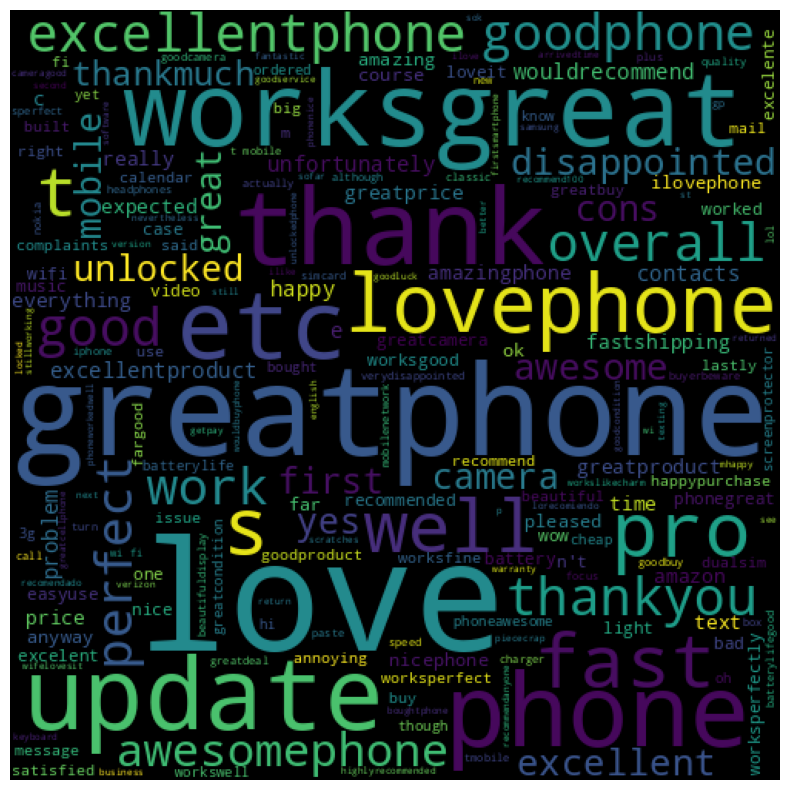

In [37]:
from wordcloud import WordCloud

# 워드 클라우드는 값이 큰 리뷰에 대해 글씨 크기를 크게 설정, 값이 작은 리뷰에 대해서는 작게 표현
# Ex) apple : 100, banana : 30
wc = WordCloud(max_font_size =100, width=500, height=500)

# 문장 기반으로 단어들의 wordcloud 그리기
all_review_wc = wc.generate(''.join(all_reviews_tokens_clean))

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(all_review_wc)
plt.show()

In [38]:
# 워드 클라우드를 여러번 그리면서 전처리 과정을 간소화 하기 위해 함수로 만들어 놓기
def clean_reviews(df):

  # 데이터 프레임의 리뷰를 하나의 문자열로 이어주기
  reviews = ' '.join(df['Reviews'])

  # 소문자화 수행
  reviews_lower = reviews.lower()

  # 토큰화
  reviews_tokens = word_tokenize(reviews_lower)

  # 불용어 제거
  reviews_tokens_clean = [ token for token in reviews_tokens if token not in stopwords.words("english") ]

  return reviews_tokens_clean

def draw_wordcloud(df):
  global wc

  # 전처리가 완료된 토큰 얻어내기
  reviews_tokens_clean = clean_reviews(df)

  # 워드클라우드 그리기(이미지 받기)
  reviews_wc = wc.generate(' '.join(reviews_tokens_clean))

  return reviews_wc

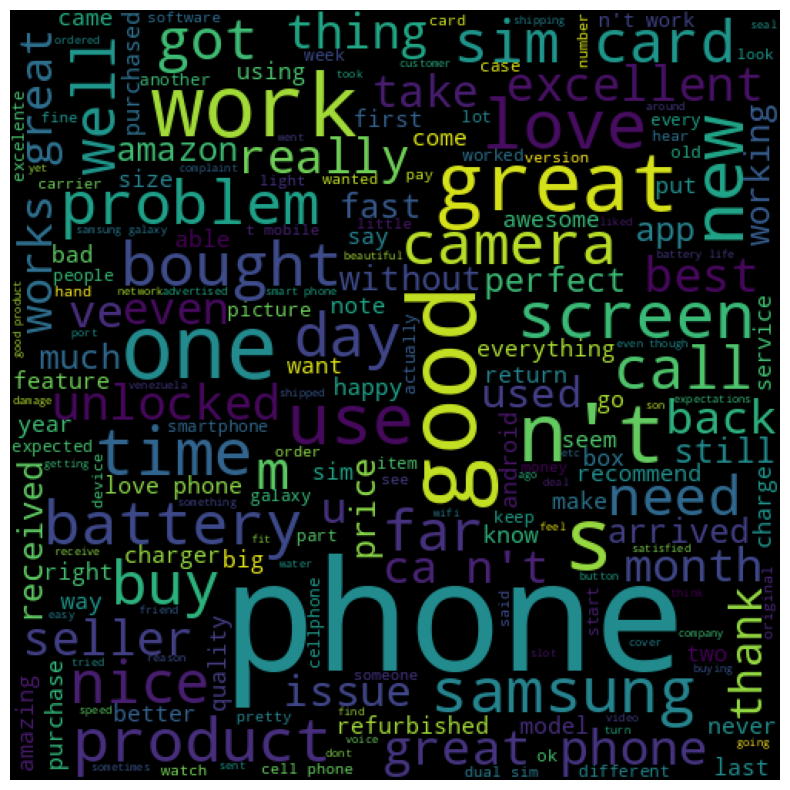

In [39]:
# 삼성 폰에 대해서만 워드 클라우드 그리기
df_samsung = df_sample[df_sample['Brand Name'] == "Samsung"]

samsung_review_wc = draw_wordcloud(df_samsung)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(samsung_review_wc)
plt.show()

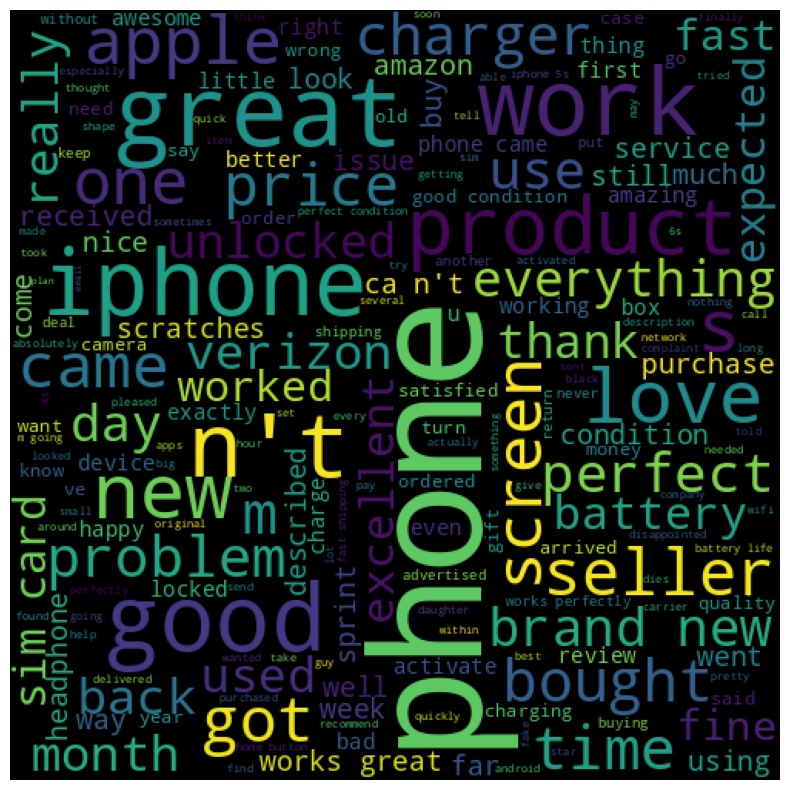

In [40]:
# 애플 폰에 대해서만 워드 클라우드 그리기
df_apple = df_sample[df_sample['Brand Name'] == "Apple"]

apple_review_wc = draw_wordcloud(df_apple)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(samsung_review_wc)
plt.show()

# Spacy 사용하기

In [41]:
import spacy

# 단어 사전 다운로드
nlp = spacy.load("en_core_web_sm")

In [42]:
test_sentence = """I'm at a payphone, trying to call home. All of my change I spent on you. Where have the times gone.. Baby, it's all wrong. Where are the plans we made for two."""

In [43]:
doc = nlp(test_sentence)
doc.text

"I'm at a payphone, trying to call home. All of my change I spent on you. Where have the times gone.. Baby, it's all wrong. Where are the plans we made for two."

In [44]:
# spacy에 통과시킨 doc로 부터 각 단어의 정보를 확인할 수 있다.
# 출력 결과에서 Lemma는 단어의 원형을 의미한다.
for word_token in doc:
  print("word : {}\t\tPOS : {}\t\tLemma : {}".format(word_token.text, word_token.pos_, word_token.lemma_))

word : I		POS : PRON		Lemma : I
word : 'm		POS : AUX		Lemma : be
word : at		POS : ADP		Lemma : at
word : a		POS : DET		Lemma : a
word : payphone		POS : NOUN		Lemma : payphone
word : ,		POS : PUNCT		Lemma : ,
word : trying		POS : VERB		Lemma : try
word : to		POS : PART		Lemma : to
word : call		POS : VERB		Lemma : call
word : home		POS : NOUN		Lemma : home
word : .		POS : PUNCT		Lemma : .
word : All		POS : PRON		Lemma : all
word : of		POS : ADP		Lemma : of
word : my		POS : PRON		Lemma : my
word : change		POS : NOUN		Lemma : change
word : I		POS : PRON		Lemma : I
word : spent		POS : VERB		Lemma : spend
word : on		POS : ADP		Lemma : on
word : you		POS : PRON		Lemma : you
word : .		POS : PUNCT		Lemma : .
word : Where		POS : SCONJ		Lemma : where
word : have		POS : AUX		Lemma : have
word : the		POS : DET		Lemma : the
word : times		POS : NOUN		Lemma : time
word : gone		POS : VERB		Lemma : go
word : ..		POS : PUNCT		Lemma : ..
word : Baby		POS : PROPN		Lemma : Baby
word : ,		POS : PUNCT		Lemma 

In [45]:
# 반복문에서 현재 진행 상황이 얼마나 되는지를 표시
from tqdm import tqdm

under_100_words_mask = df_sample.dropna()['Review Words'] < 100
df_sample_under_100 = df_sample[under_100_words_mask]
df_sample_under_100

Product Name     Brand Name  \
193285  HTC One M7 32GB Unlocked GSM 4G LTE Android Ce...            HTC   
161354  BLU VIVO 5 Smartphone -5.5" 4G LTE GSM Unlocke...            BLU   
254387  Motorola Moto X (2nd generation) Unlocked Cell...       Motorola   
328319  Samsung Galaxy Note 4 SM-N910H 32GB Factory Un...        Samsung   
231862  LG Nexus 5X Unlocked Smartphone - White 32GB (...             LG   
...                                                   ...            ...   
265972  Nokia E71x Unlocked Phone with QWERTY Keyboard...          Nokia   
387983  Sony Ericsson Walkman W580 Unlocked GSM Phone ...  Sony Ericsson   
11815              Apple iPhone 4S 16GB (Black) - Verizon          Apple   
195329  HTC One M8 Unlocked Cellphone, International, ...            HTC   
263132  Nokia C3-00 Unlocked Cell Phone (Slate) with Q...          Nokia   

         Price  Rating                                            Reviews  \
193285  133.95       5  I'm jus loving it. I had an HTC One X+ before ...   
161354  199.95       5                                       High quality   
254387  109.00       5  This phone is just so great! I had a Moto G pr...   
328319  449.99       5                                      Great product   
231862  399.00       5                                  Very good product   
...        ...     ...                                                ...   
265972   59.99       5  i am 25 years old from greece...i just got nok...   
387983  269.10       3  This phone was used to replace existing one. T...   
11815   224.77       5  Product arrived on time and looks as good as n...   
195329  282.87       5                                          very well   
263132   49.99       5  I love the way you handle business , I love it...   

        Review Votes  Review Words  
193285           9.0          46.0  
161354           1.0           2.0  
254387           0.0          84.0  
328319           0.0           2.0  
231862           0.0           3.0  
...              ...           ...  
265972           0.0          67.0  
387983           0.0          44.0  
11815            0.0          22.0  
195329           0.0           2.0  
263132           0.0          70.0  

[3040 rows x 7 columns]

In [46]:
# 모든 리뷰를 소문자로 변경
df_sample_under_100['Reviews_lower'] = df_sample_under_100['Reviews'].apply(lambda x : x.lower())
df_sample_under_100.head()

<ipython-input-46-c113b0825a3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_under_100['Reviews_lower'] = df_sample_under_100['Reviews'].apply(lambda x : x.lower())


Product Name Brand Name   Price  \
193285  HTC One M7 32GB Unlocked GSM 4G LTE Android Ce...        HTC  133.95   
161354  BLU VIVO 5 Smartphone -5.5" 4G LTE GSM Unlocke...        BLU  199.95   
254387  Motorola Moto X (2nd generation) Unlocked Cell...   Motorola  109.00   
328319  Samsung Galaxy Note 4 SM-N910H 32GB Factory Un...    Samsung  449.99   
231862  LG Nexus 5X Unlocked Smartphone - White 32GB (...         LG  399.00   

        Rating                                            Reviews  \
193285       5  I'm jus loving it. I had an HTC One X+ before ...   
161354       5                                       High quality   
254387       5  This phone is just so great! I had a Moto G pr...   
328319       5                                      Great product   
231862       5                                  Very good product   

        Review Votes  Review Words  \
193285           9.0          46.0   
161354           1.0           2.0   
254387           0.0          84.0   
328319           0.0           2.0   
231862           0.0           3.0   

                                            Reviews_lower  
193285  i'm jus loving it. i had an htc one x+ before ...  
161354                                       high quality  
254387  this phone is just so great! i had a moto g pr...  
328319                                      great product  
231862                                  very good product

In [51]:
%%time

tokens_preprocessed = []

for doc in tqdm(nlp.pipe(df_sample_under_100["Reviews_lower"])):
  # 각 단어의 어간(lemma)를 구한 토큰
  lemmatized_tokens = [ token.lemma_ for token in doc if not token.is_punct and not token.is_space and not token.is_stop ]
  tokens_preprocessed.append(lemmatized_tokens)

tokens_preprocessed[:3]

3040it [00:13, 229.64it/s]

CPU times: user 12.3 s, sys: 29.5 ms, total: 12.4 s
Wall time: 13.3 s


[['jus',
  'love',
  'htc',
  'x+',
  'thisand',
  'eveeverythe',
  'well',
  'well',
  'camera',
  'well',
  'night',
  'shot',
  'camera',
  'slow',
  'motion',
  'camera',
  'htc',
  'zoey.untill',
  'good',
  'experience',
  'htc',
  'device',
  'love',
  'aluminum',
  'body'],
 ['high', 'quality'],
 ['phone',
  'great',
  'moto',
  'g',
  'prior',
  'love',
  'upgrade',
  'continue',
  'love',
  'moto',
  'family',
  'app',
  'easy',
  'navigate',
  'like',
  'assistant',
  'feature',
  'figure',
  'life',
  'schedule',
  'adapt',
  'base',
  'usage',
  'phone',
  'intuitive',
  'casual',
  'business',
  'lifestyle',
  'great',
  'flow',
  'official',
  'personal',
  'business']]

# Bigram & Trigram


Bigram
- 단어를 두 개씩 묶어주기


Trigram
- 단어를 세 개씩 묶어주기

In [52]:
# gensim 패키지 활용. gensim 패키지는 자연어 처리 관련 여러 라이브러리를 포함
from gensim.models.phrases import Phrases, Phraser

sentences = [
    '피카츄 라이츄 파이리 꼬부기',
    '피카츄 라이츄 의 진화 전 포켓몬 입니다',
    '피카츄 라이츄 파이리 꼬부기',
    '피카츄 라이츄 파이리 는 친구 입니다'
]

word_lsts = [ s.split() for s in sentences ]
word_lsts

[['피카츄', '라이츄', '파이리', '꼬부기'],
 ['피카츄', '라이츄', '의', '진화', '전', '포켓몬', '입니다'],
 ['피카츄', '라이츄', '파이리', '꼬부기'],
 ['피카츄', '라이츄', '파이리', '는', '친구', '입니다']]

In [56]:
# min_count : 바이그램의 최소 등장 횟수
# threshold : 값이 작아지면 작아질 수록 두 토큰을 잘 붙여준다.
#             기본 값은 무조건 10.0이고, 양수, 0.01같이 작은 값으로 설정하면
#             웬만하면 합성어가 된다.

bigram = Phrases(word_lsts, min_count=1, threshold=1, delimiter= '_')
bigram_phraser = Phraser(bigram)

# 단어를 한 개씩 꺼내기
for word_list in word_lsts:
  bigram_s = bigram_phraser[word_list]

  print("유니그램 : {}".format(word_list))
  print("바이그램 : {}".format(bigram_s))
  print("-"*40)

유니그램 : ['피카츄', '라이츄', '파이리', '꼬부기']
바이그램 : ['피카츄_라이츄', '파이리_꼬부기']
----------------------------------------
유니그램 : ['피카츄', '라이츄', '의', '진화', '전', '포켓몬', '입니다']
바이그램 : ['피카츄_라이츄', '의', '진화', '전', '포켓몬', '입니다']
----------------------------------------
유니그램 : ['피카츄', '라이츄', '파이리', '꼬부기']
바이그램 : ['피카츄_라이츄', '파이리_꼬부기']
----------------------------------------
유니그램 : ['피카츄', '라이츄', '파이리', '는', '친구', '입니다']
바이그램 : ['피카츄_라이츄', '파이리', '는', '친구', '입니다']
----------------------------------------


In [59]:
# trigram : 바이그램을 다시한번 묶어주면 된다.
#  bigram_phraser[word_lsts] : 모든 문장에 대한 바이그램
trigram = Phrases(bigram_phraser[word_lsts], min_count=1, threshold=1.0, delimiter="_")
trigram_phraser = Phraser(trigram)

bigram_vocab_set = set(bigram.vocab.keys())
trigram_vocab_set = set(trigram.vocab.keys())

print("== Bigram Model vocab")
print({vocab for vocab in bigram_vocab_set})
print("--"*20)
print("== Trigram Model vocab")
print({vocab for vocab in trigram_vocab_set})
print("--"*20)

== Bigram Model vocab
{'친구_입니다', '파이리', '입니다', '포켓몬_입니다', '전_포켓몬', '피카츄', '전', '파이리_는', '피카츄_라이츄', '라이츄_파이리', '파이리_꼬부기', '는_친구', '진화', '라이츄', '꼬부기', '포켓몬', '라이츄_의', '의_진화', '의', '진화_전', '는', '친구'}
----------------------------------------
== Trigram Model vocab
{'피카츄_라이츄_파이리_꼬부기', '친구_입니다', '피카츄_라이츄_의', '파이리', '입니다', '포켓몬_입니다', '전_포켓몬', '전', '파이리_는', '피카츄_라이츄', '파이리_꼬부기', '피카츄_라이츄_파이리', '는_친구', '진화', '포켓몬', '의_진화', '의', '진화_전', '는', '친구'}
----------------------------------------


## 리뷰 데이터 trigram 만들기

In [60]:
%%time
bigram_model = Phrases(tokens_preprocessed)
bogram_phraser = Phraser(bigram_model)

CPU times: user 160 ms, sys: 283 µs, total: 160 ms
Wall time: 915 ms


In [61]:
# 바이그램 토큰 생성
tokens_bigram = [ bigram_phraser[token] for token in tokens_preprocessed ]
tokens_bigram[:3]

[['jus',
  'love',
  'htc',
  'x+',
  'thisand',
  'eveeverythe',
  'well',
  'well',
  'camera',
  'well',
  'night',
  'shot',
  'camera',
  'slow',
  'motion',
  'camera',
  'htc',
  'zoey.untill',
  'good',
  'experience',
  'htc',
  'device',
  'love',
  'aluminum',
  'body'],
 ['high', 'quality'],
 ['phone',
  'great',
  'moto',
  'g',
  'prior',
  'love',
  'upgrade',
  'continue',
  'love',
  'moto',
  'family',
  'app',
  'easy',
  'navigate',
  'like',
  'assistant',
  'feature',
  'figure',
  'life',
  'schedule',
  'adapt',
  'base',
  'usage',
  'phone',
  'intuitive',
  'casual',
  'business',
  'lifestyle',
  'great',
  'flow',
  'official',
  'personal',
  'business']]

In [65]:
# 트라이그램 토큰 생성
trigram_model = Phrases(tokens_bigram) # 바이그램 토큰으로 트라이그램 토큰 생성
trigram_pharaser = Phraser(trigram_model)

In [67]:
tokens_trigram = [ trigram_phraser[token] for token in tokens_bigram ]
tokens_trigram[:3]

[['jus',
  'love',
  'htc',
  'x+',
  'thisand',
  'eveeverythe',
  'well',
  'well',
  'camera',
  'well',
  'night',
  'shot',
  'camera',
  'slow',
  'motion',
  'camera',
  'htc',
  'zoey.untill',
  'good',
  'experience',
  'htc',
  'device',
  'love',
  'aluminum',
  'body'],
 ['high', 'quality'],
 ['phone',
  'great',
  'moto',
  'g',
  'prior',
  'love',
  'upgrade',
  'continue',
  'love',
  'moto',
  'family',
  'app',
  'easy',
  'navigate',
  'like',
  'assistant',
  'feature',
  'figure',
  'life',
  'schedule',
  'adapt',
  'base',
  'usage',
  'phone',
  'intuitive',
  'casual',
  'business',
  'lifestyle',
  'great',
  'flow',
  'official',
  'personal',
  'business']]

In [68]:
# 트라이그램 토큰을 각각 문장으로 만들어서 집어 넣기
df_sample_under_100['Review Preprocessed'] = [' '.join(tokens) for tokens in tokens_trigram ]
df_sample_under_100

<ipython-input-68-d78428849b5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_under_100['Review Preprocessed'] = [' '.join(tokens) for tokens in tokens_trigram ]


Product Name     Brand Name  \
193285  HTC One M7 32GB Unlocked GSM 4G LTE Android Ce...            HTC   
161354  BLU VIVO 5 Smartphone -5.5" 4G LTE GSM Unlocke...            BLU   
254387  Motorola Moto X (2nd generation) Unlocked Cell...       Motorola   
328319  Samsung Galaxy Note 4 SM-N910H 32GB Factory Un...        Samsung   
231862  LG Nexus 5X Unlocked Smartphone - White 32GB (...             LG   
...                                                   ...            ...   
265972  Nokia E71x Unlocked Phone with QWERTY Keyboard...          Nokia   
387983  Sony Ericsson Walkman W580 Unlocked GSM Phone ...  Sony Ericsson   
11815              Apple iPhone 4S 16GB (Black) - Verizon          Apple   
195329  HTC One M8 Unlocked Cellphone, International, ...            HTC   
263132  Nokia C3-00 Unlocked Cell Phone (Slate) with Q...          Nokia   

         Price  Rating                                            Reviews  \
193285  133.95       5  I'm jus loving it. I had an HTC One X+ before ...   
161354  199.95       5                                       High quality   
254387  109.00       5  This phone is just so great! I had a Moto G pr...   
328319  449.99       5                                      Great product   
231862  399.00       5                                  Very good product   
...        ...     ...                                                ...   
265972   59.99       5  i am 25 years old from greece...i just got nok...   
387983  269.10       3  This phone was used to replace existing one. T...   
11815   224.77       5  Product arrived on time and looks as good as n...   
195329  282.87       5                                          very well   
263132   49.99       5  I love the way you handle business , I love it...   

        Review Votes  Review Words  \
193285           9.0          46.0   
161354           1.0           2.0   
254387           0.0          84.0   
328319           0.0           2.0   
231862           0.0           3.0   
...              ...           ...   
265972           0.0          67.0   
387983           0.0          44.0   
11815            0.0          22.0   
195329           0.0           2.0   
263132           0.0          70.0   

                                            Reviews_lower  \
193285  i'm jus loving it. i had an htc one x+ before ...   
161354                                       high quality   
254387  this phone is just so great! i had a moto g pr...   
328319                                      great product   
231862                                  very good product   
...                                                   ...   
265972  i am 25 years old from greece...i just got nok...   
387983  this phone was used to replace existing one. t...   
11815   product arrived on time and looks as good as n...   
195329                                          very well   
263132  i love the way you handle business , i love it...   

                                      Review Preprocessed  
193285  jus love htc x+ thisand eveeverythe well well ...  
161354                                       high quality  
254387  phone great moto g prior love upgrade continue...  
328319                                      great product  
231862                                       good product  
...                                                   ...  
265972  25 year_old greece get nokia e71 smartphone ha...  
387983  phone replace exist issue att ping phone reset...  
11815   product arrive_time look good new daughter_lov...  
195329                                                     
263132  love way handle business love fully recommend ...  

[3040 rows x 9 columns]

## TfidfVectorizer 사용
- 각 단어의 문장 내 중요도를 보고 중요한 단어들을 더 크게 워드클라우드로 그리겠다.

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

review_tfidf_vectorizer = TfidfVectorizer().fit(df_sample_under_100['Review Preprocessed'])

In [70]:
# documents : 사용자가 입력한 리뷰
  # ex) 삼성 갤럭시 리뷰 중 좋은 평가를 받은 리뷰
def average_tfidf_score(documents):

  # 입력된 리뷰에 대한 tfidf 구해내기
  tfidf_scores = review_tfidf_vectorizer.transform(documents)

  # 단어와, 그 단어에 대한 tfidf 점수의 합을 저장할 딕셔너리
  scores = {}

  # 단어 별 점수 구하기
  for document, tfidf_score in zip(documents, tfidf_scores): # documents: 문장들(DataFrame) , tfidf_scores: 바우
    # spacy를 통한 전처리 작업을 그대로 수행
    doc = nlp(document)
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_space and not token.is_stop ]

    # 각 문서 별 단어를 꺼내서
    for term in lemmatized_tokens:
      # tfidf 의 단어 집합에 존재한다면
      if term in review_tfidf_vectorizer.vocabulary_.keys(): # term 변수 안의 단어가 tfidf_scores 바우 안에 들어가 있는지 하나씩 확인

        # 점수를 구해서 합해주기
        # tfidf_score[0, ...] : tfidf_score는 2차원 배열인데, 하나씩 들어오기 때문에 tfidf_score의 shape은 (1, vocab_size)
        # 첫번째 문장에 대한 score가 주어져서 어떤 위치에 저장되면, 어떠한 단어(term)가 들어왔을 때, 그 단어 위치에 의한 score를 찾기 위한 코드
        scores[term] = tfidf_score[0, review_tfidf_vectorizer.vocabulary_[str(term).strip()]] + scores.get(term, 0)

  return scores

In [71]:
# 애플의 좋은 리뷰에 대한 단어를 워드 클라우드로 분석

df_apple = df_sample_under_100[df_sample_under_100['Brand Name'] == "Apple"]
df_apple_rating_over_3 = df_apple[df_apple['Rating'] > 3]
df_apple_rating_over_3

Product Name Brand Name    Price  \
72331  Apple iPhone 7 Plus Unlocked Phone 256 GB - US...      Apple  1157.00   
22103     Apple iPhone 5 Unlocked Cellphone, 32GB, White      Apple   265.00   
24208                Apple iPhone 5c 16GB (Green) - AT&T      Apple   648.00   
57516   Apple iPhone 6 Plus 64GB Gold (Factory Unlocked)      Apple   615.00   
43882     Apple iPhone 5s 32GB (Gold) - Verizon Wireless      Apple   125.00   
...                                                  ...        ...      ...   
21922     Apple iPhone 5 Unlocked Cellphone, 32GB, White      Apple   265.00   
58777  Apple iPhone 6 Plus Factory Unlocked Cellphone...      Apple   605.00   
71602  Apple iPhone 6S Plus Unlocked Smartphone, 64 G...      Apple    26.41   
38441         Apple iPhone 5c AT&T Cellphone, 16GB, Blue      Apple   124.00   
11815             Apple iPhone 4S 16GB (Black) - Verizon      Apple   224.77   

       Rating                                            Reviews  \
72331       5                                               good   
22103       5  I really love this produce !! Good price and f...   
24208       5                           Nice phone fast shipping   
57516       5  Thoroughly enjoyable buying experience and I c...   
43882       5  Exactly what we ordered! Perfect! Would defian...   
...       ...                                                ...   
21922       5  I was shocked when I received this in the mail...   
58777       5  I love that this phone was easy to transfer to...   
71602       4                           Good phone& good dealer.   
38441       5                           grand daughter loved it.   
11815       5  Product arrived on time and looks as good as n...   

       Review Votes  Review Words  \
72331           0.0           1.0   
22103           0.0          11.0   
24208           0.0           4.0   
57516           0.0          14.0   
43882           1.0           9.0   
...             ...           ...   
21922           0.0          74.0   
58777           1.0          84.0   
71602           0.0           4.0   
38441           1.0           4.0   
11815           0.0          22.0   

                                           Reviews_lower  \
72331                                               good   
22103  i really love this produce !! good price and f...   
24208                           nice phone fast shipping   
57516  thoroughly enjoyable buying experience and i c...   
43882  exactly what we ordered! perfect! would defian...   
...                                                  ...   
21922  i was shocked when i received this in the mail...   
58777  i love that this phone was easy to transfer to...   
71602                           good phone& good dealer.   
38441                           grand daughter loved it.   
11815  product arrived on time and looks as good as n...   

                                     Review Preprocessed  
72331                                               good  
22103              love produce good price fast_shipping  
24208                           nice phone fast_shipping  
57516  thoroughly enjoyable buying experience pleased...  
43882              exactly order perfect defiantly order  
...                                                  ...  
21922  shock receive mail buy cheap price expect lot ...  
58777  love phone easy transfer straight_talk set int...  
71602                             good phone good dealer  
38441                                grand daughter_love  
11815  product arrive_time look good new daughter_lov...  

[400 rows x 9 columns]

In [72]:
# 애플 스마트폰에 대한 긍정적인 평가의 각 단어 별 tfidf 점수합 확인
apple_positive_review_tfidf_scores = average_tfidf_score(df_apple_rating_over_3['Review Preprocessed'])
apple_positive_review_tfidf_scores

{'good': 35.40475121059991,
 'love': 15.13480985497658,
 'produce': 0.6869854842456111,
 'price': 6.972068565006126,
 'fast_shipping': 1.5739391338725264,
 'nice': 6.70891616111018,
 'phone': 36.739897018641805,
 'thoroughly': 0.4799318413859809,
 'enjoyable': 0.5044978714233703,
 'buying': 0.44898230376521014,
 'experience': 1.1292948748276639,
 'pleased': 0.528818083769231,
 'purchase': 3.5054478417203967,
 'exactly': 4.572420282310671,
 'order': 6.904540481310597,
 'perfect': 14.089208683857347,
 'defiantly': 1.141304247684927,
 'great': 39.645561147151525,
 'seller': 9.137715737135292,
 'item': 1.3634297400575957,
 'description': 1.8876679894677166,
 'include': 1.2349690935002993,
 'photo': 0.7653077221815136,
 'actual': 0.6281705631512841,
 'kudo': 0.42357886487168,
 'work': 21.75165556924828,
 'excelente': 2.5091290650936724,
 'thank': 13.845451799634086,
 'think': 2.8344175131481144,
 'pay': 2.0710642713896146,
 'product': 14.801511661563636,
 'shape': 2.7303460213459934,
 'buy'

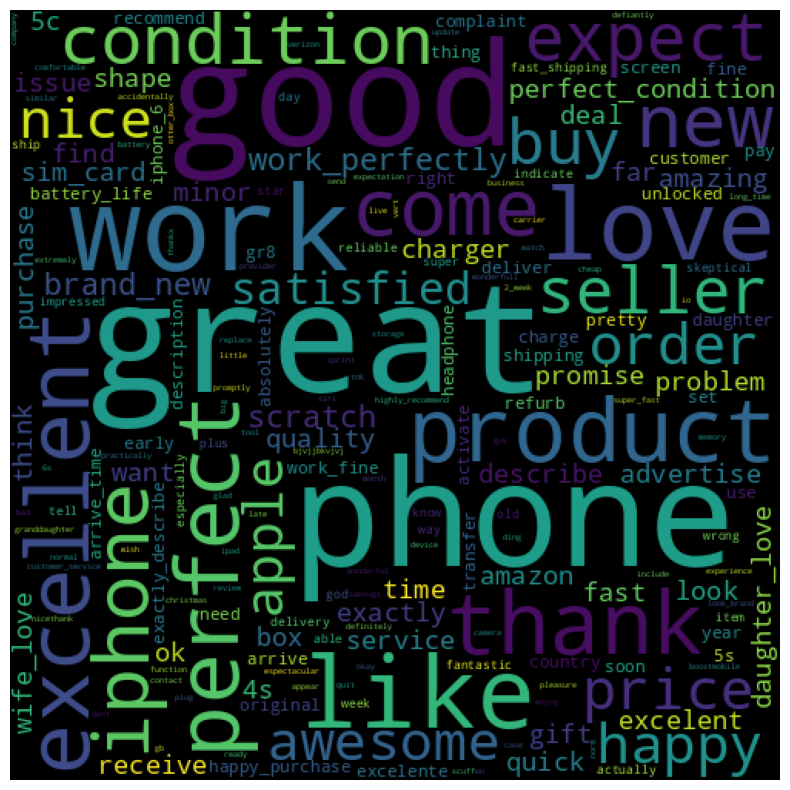

In [75]:
apple_positive_tfidf_wc = wc.generate_from_frequencies(apple_positive_review_tfidf_scores)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(apple_positive_tfidf_wc)
plt.show()